
# Project: Movies Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set compares between 10866 movies based on the actors that were in the movies, the revenue they made, their budget, etc.
>
> we will be studying this data from three areas:
> 1- the relationship between the run time of the movie and the popularity, 2- the relationship between the budget and the popularity of the movie, 3- how much the budget of movies have changed over the years, and 4- does having a higher revenue means that the movie is more popular?

<a id='wrangling'></a>
## Data Wrangling

> in this part I will check out the data and study it for the analysis
### General Properties

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> As we can see from the above investigation we have sum missing values. also there are some columns that need to be dropped since they will be irrelevant.(you may check what are these columns in the code on the cleaning data part).

> We can notice that most of the movies have a budget equal to or less than 15 million US dollars. The movies budget on average is 14.6 miilion US dollars and the profit on avearage is 39.8 million US dollars.

> In the next part we will perform some data cleaning including dropping irrelevant columns, dealing with null values, checking for duplicated values and dealing with them, and dealing with incorrect data types.

### Data Cleaning 

In [7]:
#Here I will drop unwanted columns
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'production_companies', 'release_date', 'keywords', 'director', 'cast'], axis = 1, inplace = True)
df.head(10888)

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,Documentary,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,176,Action|Adventure|Drama,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery|Comedy,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,22,5.4,1966,0.000000e+00,0.000000e+00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
 9   budget_adj      10866 non-null  float64
 10  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 933.9+ KB


In [9]:
#Here I have decided to drop the rows with null values since they are a few and I don't think they will affect the Analysis.
#also the null values are in the genre column and they can't be filled manually since it is so time consuming
df.dropna(inplace = True)

In [10]:
sum(df.duplicated())

1

In [11]:
#As we can see we have only one duplicate lets deal with it
df.drop_duplicates(inplace = True)

In [12]:
df.budget.mean()

14655309.268492898

In [13]:
df["budget"].replace(0,14655309.268492898, inplace = True)

In [14]:
df.budget.isin([0]).sum()

0

> we also had a proplem which is having zeros for budget and revenue since we can not have these values as zeros I changed those values to the mean of them
as seen above I have delt with the budget proplem using pandas replace function, now I am going to use the same method below for the revenue

In [15]:
df.revenue.mean()

39911384.05045195

In [16]:
df["revenue"].replace(0,39911384.05045195, inplace = True)

In [17]:
df.revenue.isin([0]).sum()

0

In [18]:
#As seen here data is ready for analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10842 non-null  float64
 1   budget          10842 non-null  float64
 2   revenue         10842 non-null  float64
 3   original_title  10842 non-null  object 
 4   runtime         10842 non-null  int64  
 5   genres          10842 non-null  object 
 6   vote_count      10842 non-null  int64  
 7   vote_average    10842 non-null  float64
 8   release_year    10842 non-null  int64  
 9   budget_adj      10842 non-null  float64
 10  revenue_adj     10842 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1016.4+ KB


In [19]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,2.232495e+07,6.197271e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,1.001032,2.803615e+07,1.111273e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208210,1.465531e+07,3.991138e+07,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384532,1.465531e+07,3.991138e+07,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715393,1.500000e+07,3.991138e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


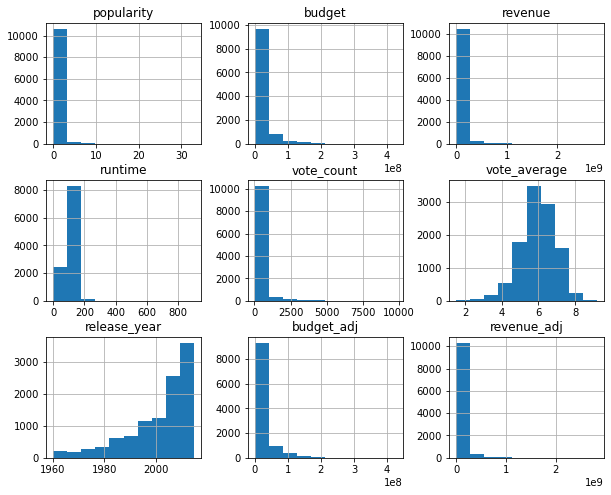

In [30]:
df.hist(figsize = (10,8));

<a id='eda'></a>
> from the seen histograms above we can make the following quick observations:

>1- we can see that most of the popularity rating are between 0 and 2

>2- alot of movies were released after the year 2000

>3- most of the movies have a run time between 1 and 2 hours

>4- most of the movies have a budget of around 15 million dollars

<a id='eda'></a>
## Exploratory Data Analysis

> in this part of the project I will be doing analysis on this dataset after I have cleaned it to try and answer the following questions:

 >1- what is the relationship between the run time of the movie and the popularity?
 
 >2- what is the relationship between the budget and the popularity of the movie?
 
 >3- how much the budget of movies have changed over the years?
 
 >4- does having a higher revenue means that the movie is more popular?

### Research Question 1: (does longer run time makes movies more popular?)

In [21]:
df.groupby('runtime').popularity.mean()

runtime
0      0.189895
2      0.258729
3      0.203960
4      0.420610
5      0.455937
         ...   
561    0.000065
566    0.147489
705    0.537593
877    0.469332
900    0.006925
Name: popularity, Length: 246, dtype: float64

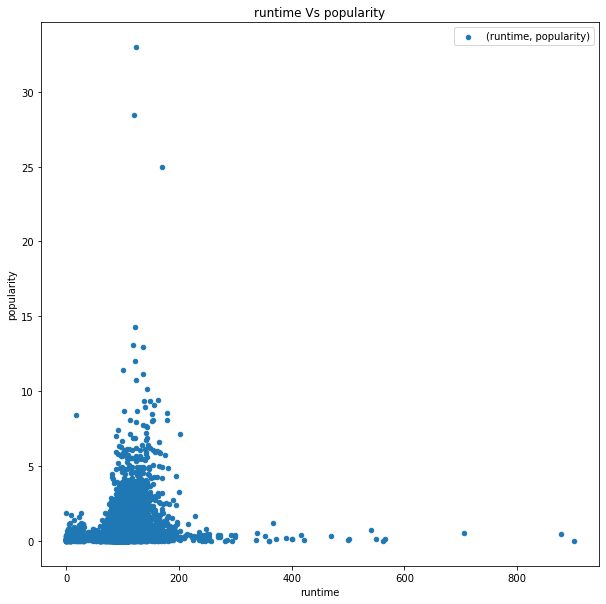

In [23]:
df.plot(x = 'runtime', y = 'popularity', kind = 'scatter', figsize=(10,10), label = '(runtime, popularity)');
plt.title('runtime Vs popularity');

> as noted above although there is no clear relationship between runtime and popularity,
> we can say that most movies have a runtime that ranges from 90 min to around 120 min, but we can't say that
> a longer run time makes a movie more popular.

### Research Question 2  (is having a bigger budget makes a movie more popular?)

In [24]:
df.groupby('budget').popularity.mean()

budget
1.0            0.315102
2.0            0.464188
3.0            0.191397
5.0            0.002922
6.0            0.105894
                 ...   
270000000.0    1.957331
280000000.0    5.944927
300000000.0    4.965391
380000000.0    4.955130
425000000.0    0.250540
Name: popularity, Length: 557, dtype: float64

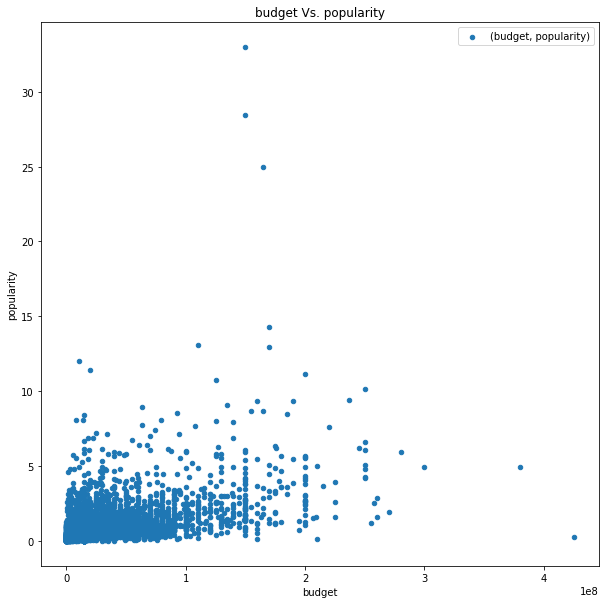

In [27]:
df.plot(x = 'budget', y = 'popularity', kind = 'scatter',figsize = (10,10), label = '(budget, popularity)');
plt.title('budget Vs. popularity');

> noting from the above analysis having a bigger budget almost always helps the movie to be more popular

### Research Question 3  (how much did the budget of movies change over the years?)

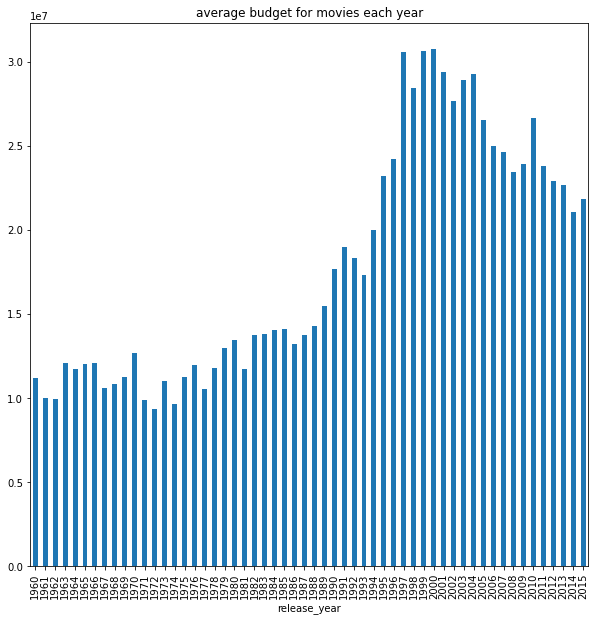

In [110]:
df.groupby('release_year').budget.mean().plot(kind = 'bar', figsize = (10,10));
plt.title('average budget for movies each year');

<a id='conclusions'></a>


> as noting from the above plot that moving forward from 1960 movies production have become more costly



<a id='conclusions'></a>


### Research Question 4  (does having a higher revenue means that the movie is more popular?)



In [19]:
df.groupby('revenue').popularity.mean()

revenue
0              0.325644
2              0.507350
3              0.356885
5              0.393743
6              0.316621
                ...    
1513528810    32.985763
1519557910     7.637767
1845034188     4.355219
2068178225    11.173104
2781505847     9.432768
Name: popularity, Length: 4702, dtype: float64

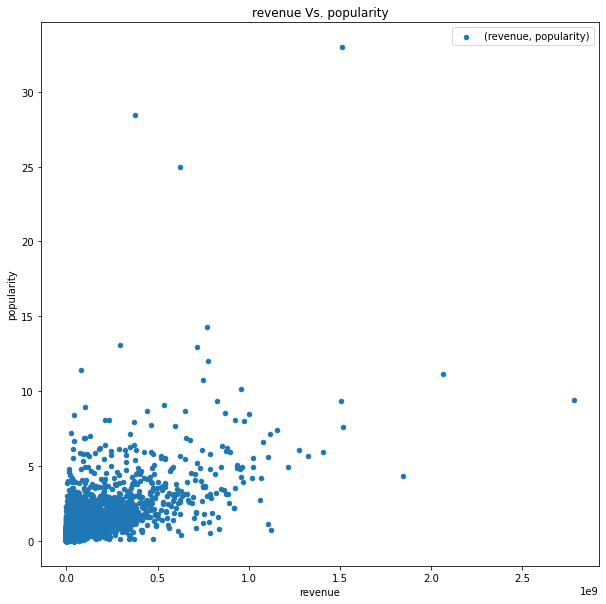

In [28]:
df.plot(x = 'revenue', y = 'popularity', kind = 'scatter',figsize = (10,10), label = '(revenue, popularity)');
plt.title('revenue Vs. popularity');

<a id='conclusions'></a>
> the above analysis shows an obvious result which is that in general having a higher revenue means that the movie is more popular

<a id='conclusions'></a>
## Conclusions

> 1- There is no direct or clear relationship between runtime and popularity, but we noted that most of the movies have a runtime between 90 min and 120 min

> 2- Having a bigger budget is in fact a good factor for a movie to be more popular

> 3- Moving from 1960 to 2015 movies have required more budget to be made

> 4- Having a good revenue implies having a high popularity

> 5- in order to make a good analysis on a data you need to understand the data so you could clean it manipulate it and make it ready for your analysis

> 6- Also we noted some limitations in the data set we have and we can adress them as follows:

> i- as read in the first conclusion although most of the that aer popular have a run time between 90 and 120 min that does not mean they have a direct relation ship between them or that they affect each other

> ii- the data we acquired had some missing values that we had to drop the entire raw because of it, that caused limitations for our conclusion

> iii- also trying to make the collected data as random as possible (not from the same place or same type of people) would make our analysis more general
